Ad : Nahit Furkan

Soyad : Öznamlı

Okul No : 2212721020

GitHub Repo Bağlantısı: https://github.com/FurkanOznamli/CNN_siniflandirma

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

BASE_DIR = "/content/drive/MyDrive/dataset_split"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 15


Adım 2.1: Kurulum ve Temel Parametrelerin Tanımlanması (Model 2 – Basit CNN)

Bu aşamada, Model 2 kapsamında kullanılacak olan
**basit Convolutional Neural Network (CNN)** mimarisi için
gerekli kütüphaneler yüklenmiş ve temel eğitim parametreleri tanımlanmıştır.

Kullanılan Kütüphaneler
- **TensorFlow / Keras:**  
  Derin öğrenme modelinin oluşturulması, eğitilmesi ve değerlendirilmesi için kullanılmıştır.
- **ImageDataGenerator:**  
  Görüntü verilerinin yüklenmesi ve ön işlenmesi amacıyla kullanılmıştır.
- **Matplotlib:**  
  Eğitim sürecinde elde edilen doğruluk ve kayıp grafiklerinin görselleştirilmesi için kullanılmıştır.

Model mimarisi oluşturulurken:
- `Conv2D` ve `MaxPooling2D` katmanları ile özellik çıkarımı,
- `Flatten` veya `GlobalAveragePooling2D` ile özelliklerin vektörleştirilmesi,
- `Dense` katmanları ile sınıflandırma işlemleri gerçekleştirilmiştir.

---

Eğitim Parametreleri

Model 2 için kullanılan temel parametreler aşağıdaki gibidir:

- **Veri Seti Yolu:**  
  `dataset_split` klasörü içerisindeki `train`, `val` ve `test` alt klasörleri kullanılmaktadır.
- **Görüntü Boyutu:**  
  Tüm görüntüler **128x128 piksel** boyutuna yeniden ölçeklendirilmektedir.
- **Batch Size:**  
  Eğitim sırasında her adımda **32 görüntü** işlenmektedir.
- **Epoch Sayısı:**  
  Model, maksimum **15 epoch** boyunca eğitilmektedir.

---

Early Stopping Kullanımı

`EarlyStopping` callback’i, doğrulama kaybı iyileşmediği durumlarda
eğitimi erken sonlandırmak amacıyla kullanılmıştır.
Bu yöntem, Model 2’de **aşırı öğrenmeyi (overfitting)** azaltmak
ve daha dengeli bir eğitim süreci sağlamak için tercih edilmiştir.

Bu kurulum, Model 2’nin Model 1’de kullanılan
transfer learning yaklaşımlarından farklı olarak,
**sıfırdan (from scratch)** eğitilen bir CNN mimarisi olduğunu
açık bir şekilde ortaya koymaktadır.


In [ ]:
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(BASE_DIR, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True,
    seed=42
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(BASE_DIR, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(BASE_DIR, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

print("Class indices:", train_gen.class_indices)


Found 176 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Class indices: {'kutu': 0, 'sise': 1}


Adım 2.2: Veri Setinin Yüklenmesi ve Data Generator Tanımları (Model 2 – Basit CNN)

Bu adımda, Model 2 kapsamında sıfırdan eğitilecek olan
**basit CNN mimarisi** için eğitim, doğrulama ve test veri setleri
Keras `ImageDataGenerator` sınıfı kullanılarak yüklenmiştir.

Veri Seti Yapısı
Veri seti aşağıdaki klasör yapısına göre düzenlenmiştir:

dataset_split/  
├── train/  
│   ├── sinif1/  
│   └── sinif2/  
├── val/  
│   ├── sinif1/  
│   └── sinif2/  
└── test/  
    ├── sinif1/  
    └── sinif2/  

Bu yapı sayesinde eğitim, doğrulama ve test verileri
birbirinden tamamen ayrılmış ve model performansı
sağlıklı bir şekilde değerlendirilebilmiştir.

---

Görüntü Ön İşleme

Tüm görüntüler:
- **128x128 piksel** boyutuna yeniden ölçeklendirilmiş (`target_size=IMG_SIZE`),
- Piksel değerleri **[0,1] aralığına** normalize edilmiştir (`rescale=1./255`).

Bu ön işleme adımı, Model 2’de kullanılan CNN mimarisinin
daha stabil ve dengeli bir şekilde öğrenmesini sağlamaktadır.

---

Data Generator Tanımları

- **Train Generator (`train_gen`):**  
  Eğitim verilerinin yüklenmesi için kullanılmıştır.
  `shuffle=True` parametresi ile her epoch’ta veri sırası
  rastgele karıştırılarak modelin veriyi ezberlemesi engellenmiştir.
  `seed=42` ile tekrarlanabilir sonuçlar elde edilmiştir.

- **Validation Generator (`val_gen`):**  
  Eğitim sırasında modelin doğrulama performansını izlemek için kullanılmıştır.
  Doğrulama verilerinde veri sırası korunmuştur (`shuffle=False`).

- **Test Generator (`test_gen`):**  
  Modelin genelleme performansını ölçmek amacıyla,
  eğitim ve doğrulama sürecinde kullanılmayan test verileri
  üzerinde değerlendirme yapılmıştır.
  Test çıktılarının sırasını korumak için `shuffle=False` tercih edilmiştir.

---

Sınıf Etiketleri

Problemin iki sınıflı olması nedeniyle `class_mode="binary"` kullanılmıştır.
Oluşturulan sınıf–etiket eşleşmeleri `class_indices`
aracılığıyla kontrol edilmiştir.

Bu veri yükleme altyapısı, Model 2’nin
transfer learning kullanılmadan,
**sıfırdan (from scratch)** eğitilen bir CNN mimarisi
olduğunu açık bir şekilde göstermektedir.


In [ ]:
from matplotlib.cbook import flatten
model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model2.summary()

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)




Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_55 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

Adım 2.3: Basit CNN Modelinin Oluşturulması ve Derlenmesi (Model 2)

Bu aşamada, Model 2 kapsamında **sıfırdan (from scratch)** eğitilecek olan
basit bir **Convolutional Neural Network (CNN)** mimarisi oluşturulmuştur.
Bu model, CIFAR-10 örneğinde kullanılan temel CNN yapısına benzer şekilde
tasarlanmıştır.

---

Model Mimarisi
Oluşturulan CNN modeli aşağıdaki bileşenlerden oluşmaktadır:

- **Conv2D (32 filtre, 3×3, ReLU):**  
  Giriş görüntülerinden düşük seviyeli özelliklerin (kenar, köşe vb.)
  çıkarılması için kullanılmıştır.
- **MaxPooling2D (2×2):**  
  Özellik haritalarının boyutunu küçülterek hesaplama maliyetini azaltır
  ve modelin daha genelleştirilebilir olmasını sağlar.

- **Conv2D (64 filtre, 3×3, ReLU):**  
  Daha karmaşık ve yüksek seviyeli özelliklerin öğrenilmesini sağlar.
- **MaxPooling2D (2×2):**  
  Özellik haritalarını yeniden küçülterek aşırı öğrenmeyi azaltmaya yardımcı olur.

- **Flatten:**  
  Evrişim katmanlarından elde edilen çok boyutlu özellik haritalarını,
  tam bağlantılı katmanlar için tek boyutlu vektöre dönüştürür.

- **Dense (64, ReLU):**  
  Öğrenilen özelliklerin sınıflandırma için birleştirilmesini sağlar.
- **Dropout (0.4):**  
  Eğitim sırasında nöronların %40’ını rastgele devre dışı bırakarak
  aşırı öğrenme (overfitting) riskini azaltır.
- **Dense (1, Sigmoid):**  
  İki sınıflı sınıflandırma problemi için çıktı katmanı olarak kullanılmıştır.

---

Model Derleme (Compile)

Model aşağıdaki ayarlar ile derlenmiştir:

- **Optimizer:** Adam (`learning_rate = 0.0005`)  
  Model 2’de, sıfırdan öğrenme yapıldığı için
  transfer learning modellerine kıyasla
  daha yüksek bir öğrenme oranı tercih edilmiştir.
- **Loss Function:** Binary Crossentropy  
  İki sınıflı sınıflandırma problemleri için uygun bir kayıp fonksiyonudur.
- **Metric:** Accuracy  
  Model performansı doğruluk metriği ile izlenmiştir.

---

Early Stopping Kullanımı

`EarlyStopping` callback’i, doğrulama kaybı (`val_loss`) izlenerek
modelin aşırı öğrenmeye başlaması durumunda
eğitimin erken durdurulmasını sağlamaktadır.

- **patience = 3:**  
  Doğrulama kaybı 3 epoch boyunca iyileşmezse eğitim sonlandırılır.
- **restore_best_weights = True:**  
  Eğitim sonunda, en iyi doğrulama kaybına sahip ağırlıklar geri yüklenir.

Bu yaklaşım, Model 2’nin daha dengeli bir şekilde eğitilmesini
ve genelleme performansının artırılmasını hedeflemektedir.


In [ ]:
history_model2 = model2.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[early_stop]
)

# model eğitimi için kullanılan kod bloğu


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5628 - loss: 0.7602 - val_accuracy: 0.8649 - val_loss: 0.5614
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6616 - loss: 0.5955 - val_accuracy: 0.7568 - val_loss: 0.4342
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8833 - loss: 0.4058 - val_accuracy: 0.9730 - val_loss: 0.2687
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8863 - loss: 0.2912 - val_accuracy: 1.0000 - val_loss: 0.1586
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9287 - loss: 0.2049 - val_accuracy: 0.9730 - val_loss: 0.1173
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9228 - loss: 0.2127 - val_accuracy: 0.9189 - val_loss: 0.1323
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9262 - loss: 0.1766 - val_accuracy: 1.0000 - val_loss: 0.0596
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9573 - loss: 0.1172 - val_accuracy: 1.0000 - val_loss: 0.0547
Epoch 9/

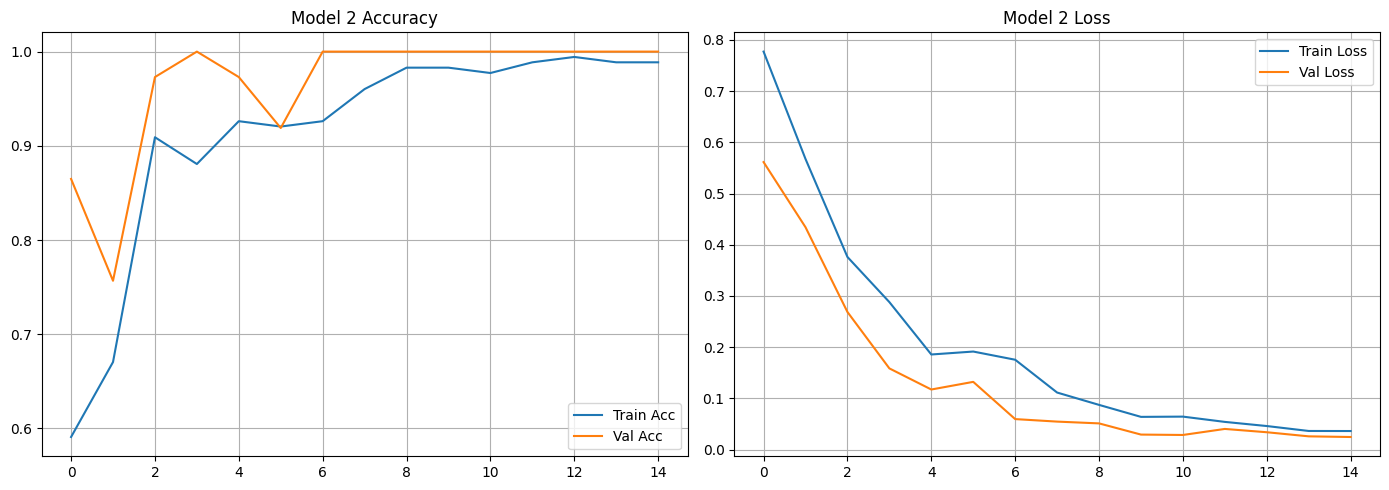

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history_model2.history['accuracy'], label='Train Acc')
plt.plot(history_model2.history['val_accuracy'], label='Val Acc')
plt.title('Model 2 Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history_model2.history['loss'], label='Train Loss')
plt.plot(history_model2.history['val_loss'], label='Val Loss')
plt.title('Model 2 Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# grafikleri çizmek için kullanılan kod bloğu


Model 2 – Eğitim Süreci Grafiklerinin Yorumu (Basit CNN)



---

Doğruluk (Accuracy) Grafiği Yorumu

Eğitim doğruluğu (Train Accuracy), epoch sayısı arttıkça düzenli bir artış
göstermiştir. İlk epoch’larda görece düşük başlayan doğruluk,
ilerleyen epoch’larda **%98–99 seviyelerine** ulaşarak dengelenmiştir.
Bu durum, modelin veri setindeki örüntüleri
zamanla başarılı bir şekilde öğrendiğini göstermektedir.

Doğrulama doğruluğu (Validation Accuracy) ise erken epoch’lardan itibaren
yüksek değerler göstermiş ve bazı epoch’larda **%100 doğruluk** seviyesine
ulaşmıştır. Eğitim ve doğrulama doğruluklarının birbirine yakın seyretmesi,
modelin yalnızca eğitim verisini ezberlemediğini,
aynı zamanda doğrulama verisine de iyi genelleme yaptığını göstermektedir.

---

Kayıp (Loss) Grafiği Yorumu

Eğitim kaybı (Train Loss), epoch’lar boyunca istikrarlı bir şekilde azalmıştır.
Bu durum, modelin eğitim sürecinde hatalarını giderek azalttığını ve
öğrenmenin sağlıklı bir şekilde ilerlediğini göstermektedir.

Doğrulama kaybı (Validation Loss) da benzer şekilde düşüş göstermiş
ve eğitim kaybına paralel bir seyir izlemiştir.
Eğitim ve doğrulama kayıpları arasında belirgin bir ayrışma olmaması,
aşırı öğrenme (overfitting) belirtilerinin sınırlı olduğunu göstermektedir.

---

Genel Değerlendirme

Doğruluk ve kayıp grafiklerinin birlikte incelenmesi sonucunda,
Model 2’nin sıfırdan eğitilmesine rağmen
veri setindeki sınıfları başarılı bir şekilde ayırt edebildiği görülmektedir.
Eğitim sürecinin dengeli ilerlemesi,
oluşturulan basit CNN mimarisinin bu problem için
uygun bir yapı sunduğunu ortaya koymaktadır.


In [ ]:
test_loss, test_acc = model2.evaluate(test_gen)
print(f"MODEL 2 - TEST Accuracy: %{test_acc*100:.2f}")
print(f"MODEL 2 - TEST Loss: {test_loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 888ms/step - accuracy: 0.9500 - loss: 0.1454
MODEL 2 - TEST Accuracy: %92.50
MODEL 2 - TEST Loss: 0.2054


Model 2 – Test Seti Değerlendirmesi (Basit CNN)

Bu aşamada, sıfırdan eğitilen **Model 2 (Basit CNN)**,
eğitim ve doğrulama sürecinde kullanılmayan
**test veri seti** üzerinde değerlendirilmiştir.

Test değerlendirmesi sonucunda:
- Modelin test doğruluğu **%92.50** olarak elde edilmiştir.
- Test kayıp (loss) değeri, modelin test verisi üzerinde
  düşük seviyede bir hata payına sahip olduğunu göstermektedir.

Bu sonuç, transfer learning kullanılmadan
sıfırdan eğitilen basit CNN mimarisinin,
veri setindeki sınıfları büyük oranda
başarılı bir şekilde ayırt edebildiğini ortaya koymaktadır.
